# Solving the n-Queens Problem using Local Search

Student Name: Prashant Iyer

I have used the following AI tools: Minimal Reference to Bard

I understand that my submission needs to be my own work: PI

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

In [389]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Helper functions

In [390]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [391]:
import warnings

warnings.filterwarnings("ignore")

In [392]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

[3 3 2 1]
Board with 4 conflicts.


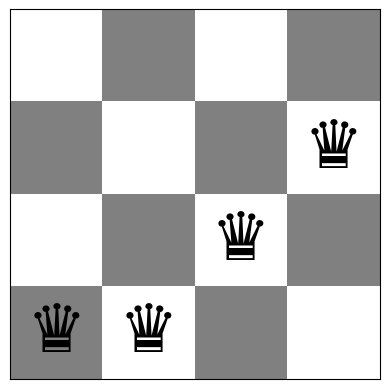

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [393]:
board = random_board(4)
print(board)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


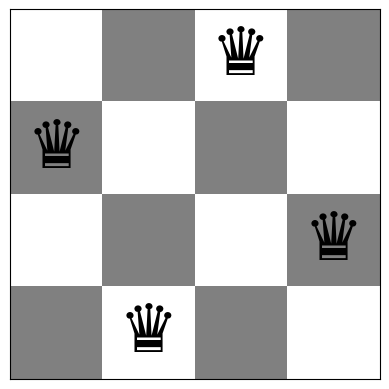

In [394]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

By trial and error, for all the algorithms, the max_iteration = n*500 helped maintain a balance between the time taken and the number of conflicts.

In this implementation of Steepest ascent hill climbing, a neighbor is randomly chosen. A neigbor can be categorized as a better neighbor given the number of conflicts for the chosen neighbor reduces. A better neighbor is tried to be identified randomly in every iteration. All the possible neighbors are explored in each iteration. Given in successive iterations, no better neighbor is found, the current best neighbor is returned.

In [395]:
def steepest_ascent_hill_climbing(n,max_iters = None, verbose=False):
    max_iters = n * 500 if max_iters is None else max_iters
    board = random_board(n)
    if verbose: print('Initial Board Status:', show_board(board))
    current_conflicts = conflicts(board)
    neighbor_best = board.copy()
    no_better_neighbor_found = False
    #while True:
    for _ in range(max_iters):
        if no_better_neighbor_found:
            break
        no_better_neighbor_found = True
        for row in range(n):
            for col in range(n):
                if board[col] != row:
                    neighbor = board.copy()
                    neighbor[col] = row
                    neighbor_conflicts = conflicts(neighbor)
                    if neighbor_conflicts < current_conflicts:
                        neighbor_best = neighbor
                        current_conflicts = neighbor_conflicts
                        no_better_neighbor_found = False  # Reset the flag if a better neighbor is found
        if verbose: print('Current Conflicts:', current_conflicts)
        if current_conflicts == 0:
            break  # Early Termination
    return neighbor_best


[0 0 3 1]
Board with 1 conflicts.


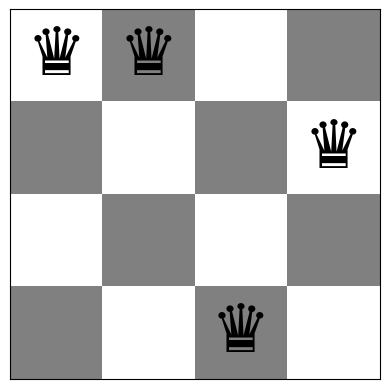

In [396]:
solution = steepest_ascent_hill_climbing(4)
print(solution)
show_board(solution)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In this implementation of stochastic hill climbing, random neighbor is identified. All the possible better neighbors (less number of conflicts) for the given positions of the queen are calculated. Once derived, a better neighbor is chosen is at random and returned as the new position of the queen with a comparatively lesser or no conflicts.

In [397]:
# Code and description go here
import random
def stochastic_hill_climbing_random(n, max_iters = None, verbose= False):
    max_iters = n * 500 if max_iters is None else max_iters
    board = random_board(n)
    if verbose: print('Initial Board Status:', show_board(board))
    current_conflicts = conflicts(board)
    neighbor_best = board.copy() #Assuming current position is the best
    #while True:
    for _ in range(max_iters):
        uphill_moves = []
        for row in range(n):
            for col in range(n):
                if board[col] != row:
                    neighbor = board.copy()
                    neighbor[col] = row
                    neighbor_conflicts = conflicts(neighbor)
                    if verbose: print(neighbor_conflicts)
                    if neighbor_conflicts < current_conflicts:
                        uphill_moves.append(neighbor)
        if not uphill_moves:
          break
        neighbor_best = random.choice(uphill_moves)
        current_conflicts = conflicts(neighbor_best) #Current state updated to a randomly chosen one
        board = neighbor_best
    return neighbor_best

[2 0 3 1]
Board with 0 conflicts.


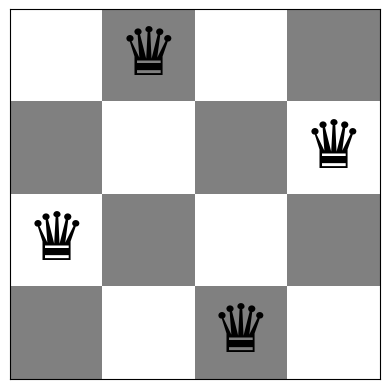

In [398]:
solution = stochastic_hill_climbing_random(4)
print(solution)
show_board(solution)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In this implementation of stochastic hill climbing first choice, better neighbors are calculated one at a time. At the end of the given number of iterations, the best neighbor with minimal number of conflicts is returned. As an early termination condition, if the number of conflicts = 0 at any time, the neighbor is returned. Also, if for a given number of iterations, no better neighbors are found, the loop is terminated as it would be stuck in a local minima and the current best neighbor is returned.

In [399]:
# Code and description go here
import random
def stochastic_hill_climbing_first_choice(n, max_iters = None, verbose=False):
    max_iters = n * 500 if max_iters is None else max_iters
    board = random_board(n)
    if verbose: print('Initial Board Status:', show_board(board))
    current_conflicts = conflicts(board)
    i = 0
    stop_counter = 0
    for i in range(max_iters):
        i += 1
        row = random.randint(0, n-1)
        col = random.randint(0, n-1)
        if board[col] != row:
          neighbor = board.copy()
          neighbor[col] = row
          neighbor_conflicts = conflicts(neighbor)
          if neighbor_conflicts < current_conflicts:
            if verbose: print('Number of tries',i)
            stop_counter = 0
            board = neighbor
            current_conflicts = neighbor_conflicts
            if current_conflicts == 0:
              break
          else:
            stop_counter += 1
          if stop_counter > (0.10 * max_iters): #10 % of the number of trials
            break
    if verbose: print('Total Tries:', i)
    return board

[2 1 3 0]
Board with 1 conflicts.


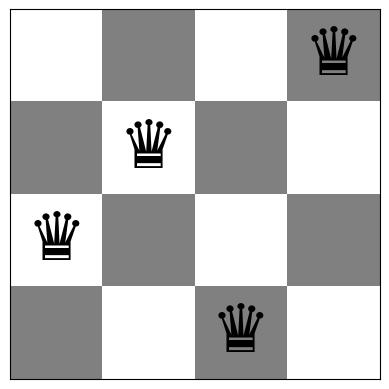

In [400]:
solution = stochastic_hill_climbing_first_choice(4)
print(solution)
show_board(solution)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In this implementation of Hill Climbing with random restarts, all the three algorithms would restart a 100 times for random boards until a combination with minimal number of conflicts is not arrived upon in the given number of tries.

In [401]:
# Code and description go here
def hill_climbing_with_restarts(n, max_restarts=100, algorithm = None):
  best_solution = None
  best_conflicts = float('inf')
  for _ in range(max_restarts):
    solution = algorithm(n)
    if solution is not None:
      current_conflicts = conflicts(solution)
      if current_conflicts < best_conflicts:
        best_solution = solution
        best_conflicts = current_conflicts
  return best_solution

steepest_ascent_hill_climbing
Board with 2 conflicts.


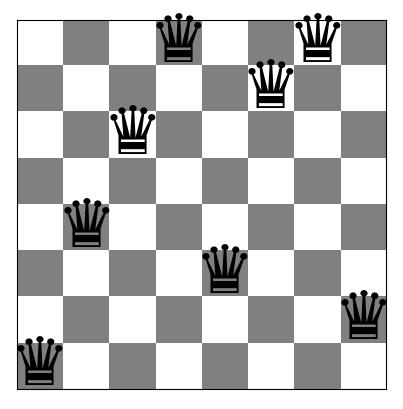

stochastic_hill_climbing_random
Board with 0 conflicts.


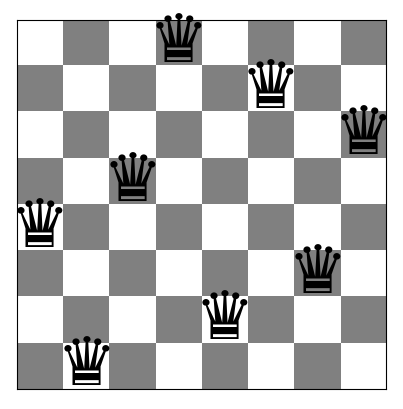

stochastic_hill_climbing_first_choice
Board with 0 conflicts.


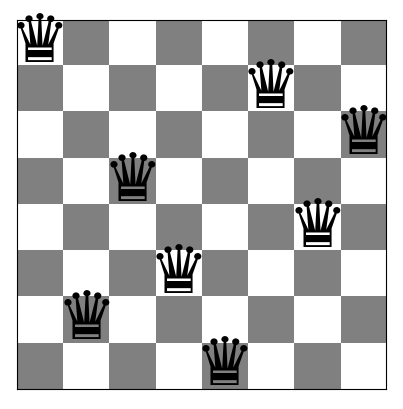

In [402]:
algorithms = [steepest_ascent_hill_climbing,stochastic_hill_climbing_random,stochastic_hill_climbing_first_choice]
for algorithm in algorithms:
  print(algorithm.__name__)
  solution = hill_climbing_with_restarts(8,100,algorithm)
  show_board(solution)
  conflicts(solution)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

This implementation of simulated annealing  avoids the local optima by following a cooling schedule and accepting the probablility of a move using Metropolis Criteria. The following is the breakdown of the implementation:

**Initial Parameters:**

n: size of board

cooling_rate(alpha): This parameter controls the speed at which the temperature is cooled down after each iteration. A value closer to 1 indicates a slower cooling as it explores more to derive the optimal move. The value used here is (0.99) to ensure the objective of least number of conflicts is achieved though that might increase the running time. After trying out various values like 0.7, 0.8 and 0.9, it was observed that 0.99 gives the best ratio of time taken to conflicts in the given number of tries.

max_iters: This parameter indicates the number of iterations done before making a decision. It is set to board_size * 500 to adjust the the number of iterations with respect to the board size. This avoids any chances of missing out on the global optima but at the same time not getting stuck in any local optima. So this values exits at the right time given the optimal temperature is not reached before this many number of tries.

The Intial temparature is calculated using the function get_initial_temperature. This function uses the Metropolis Acceptance criteria to calcualte the initial temperature.

Parameters used:
delta_e_max = Maximum range of energy change. With n queens, the maximum chage in energy or conflicts can be n*(n-1) for all pairs of queens. We just count it one time, thus at max it can be: n^2 / 2

desired_prob = 0.9 This high value indicates the desired probabilit of for accepting the moves at initial temperature T0. It helps more exploration and thus avoids a local minima.

**Formula:**

desired_prob_at_T0 = exp(-delta_e_max / T0)

Therefore,

ln(desired_prob_at_T0) = -delta_e_max / T0

T0 = -delta_e_max / ln(desired_prob_at_T0)

-delta_e_max = (n^2)/2, desired_prob_at_T0 = 0.9

Therefore,
T0 = -(n^2) / (2 * ln(0.9))

**Iterations:**
Based on the Metropolis Acceptance criteria,

desired_temperature = exp((-delta_e)/Temperature)

Here,
delta_e: Calculated as the difference of number of conflicts in the current state and the proposed new neighbor state.

Temperature: Represents the current tempearture in the annealing cooling process.

uniform_dist: A random number uniformly between 0 and 1 allows to make a probabilistic decision based on the acceptance probability

The idea behind Metropolis Acceptance criteria suggests that if this random uniform number falls withing the accpetance region(calculated using the formula) i.e. less than the accepted probability, the iterative logic allows moves with certain probability as valid as the temperarture gradually cools down. Ultimatelty, the objective function (minimal number of conflicts) is achieved in this process with the temperature cooling with every iteration. The stopping criteria here would be when the optimal value is reached or the number of tries have been exhausted. This algoithm calculates the initial temperature based on a desired acceptance probability for uphill moves. This approach helps balance exploration and exploitation during the search process.




In [403]:
# Code and description go here
import random
import math

def get_initial_temperature(n):
   delta_e_max = (n**2) / 2  # Maximum possible change in energy
   desired_prob_t0 = 0.9  # Desired acceptance probability for uphill moves at T0
   return -(n**2) / (2 * np.log(desired_prob_t0))  # Initial temperature based on probability

def simulated_annealing(n, cooling_rate=0.99, max_iters = None, verbose=False):
  if verbose: accepted_prob_values = []
  if verbose: temperature_values = []
  max_iters = n * 500 if max_iters is None else max_iters

  board = random_board(n)
  best_conflicts = conflicts(board)
  temperature = get_initial_temperature(n)  # Calculate initial temperature

  for _ in range(max_iters):
    # Select a random neighbor
    row = random.randint(0, n-1)
    col = random.randint(0, n-1)
    if board[col] != row:
      neighbor = board.copy()
      neighbor[col] = row
      neighbor_conflicts = conflicts(neighbor)

      # Metropolis acceptance criterion
      delta_e = neighbor_conflicts - best_conflicts
      uniform_dist = random.uniform(0,1)
      acceptance_prob = np.exp(-delta_e / temperature)
      if verbose: accepted_prob_values.append(acceptance_prob) #Storing the acceptance probability values for reference
      if uniform_dist < acceptance_prob:
        board = neighbor
        best_conflicts = neighbor_conflicts
        if verbose: print('current conflicts: ', best_conflicts)
        if best_conflicts == 0:
          return board  # Early termination if optimal solution found

      # Update temperature
      temperature *= cooling_rate
      if verbose: print('Current temperature: ', temperature)
      if verbose: temperature_values.append(temperature) #Storing all the temperature values for reference
  return board

Output Solution
Board with 0 conflicts.


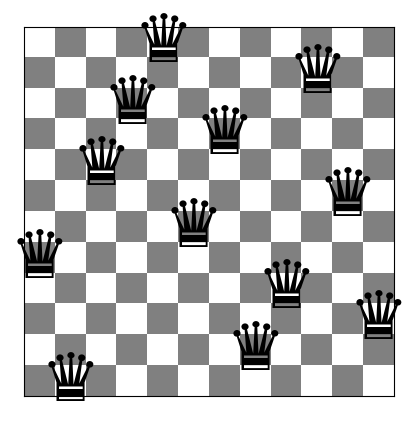

In [404]:
solution = simulated_annealing(12)
print('Output Solution')
show_board(solution)

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [405]:
# Code, results, charts and discussion go here

import pandas as pd
import time

def compare_results(algorithm, n, num_runs = 100, verbose = False):
  total_run_time = 0
  total_conflicts = 0
  optimal_solutions = 0
  if verbose: print(algorithm.__name__)

  for _ in range(num_runs):
    if verbose: print(algorithm.__name__)
    start_time = time.time()
    solution = algorithm(n)
    end_time = time.time()
    if verbose: print(solution)

    total_run_time += (end_time - start_time) * 1000 #for converting to ms
    total_conflicts += conflicts(solution)
    if conflicts(solution) == 0:
      optimal_solutions += 1

  avg_runtime = total_run_time / num_runs
  avg_conflicts = total_conflicts / num_runs
  optimal_percent = (optimal_solutions/num_runs) * 100

  return avg_runtime, avg_conflicts, optimal_percent


comparison = pd.DataFrame(columns = ['algorithm','board_size', 'avg_run_time_ms', 'avg_conflicts', 'optimal_percent'])
algorithms = [steepest_ascent_hill_climbing,stochastic_hill_climbing_random,stochastic_hill_climbing_first_choice,simulated_annealing]
board_sizes = [4,6, 8, 10, 12, 16]

for board_size in board_sizes:
  for algorithm in algorithms:
    avg_run_time, avg_conflicts, optimal_percent = compare_results(algorithm, board_size)
    comparison = comparison.append({'algorithm':algorithm.__name__,
                       'board_size':board_size,
                       'avg_run_time_ms':avg_run_time,
                       'avg_conflicts':avg_conflicts,
                       'optimal_percent':optimal_percent},ignore_index=True)



In [406]:
comparison

,algorithm,board_size,avg_run_time_ms,avg_conflicts,optimal_percent
0,steepest_ascent_hill_climbing,4,0.214596,1.39,12.0
1,stochastic_hill_climbing_random,4,0.360863,0.84,29.0
2,stochastic_hill_climbing_first_choice,4,2.065749,0.89,27.0
3,simulated_annealing,4,2.542775,0.00,100.0
4,steepest_ascent_hill_climbing,6,1.325507,2.88,0.0
5,stochastic_hill_climbing_random,6,2.148571,1.09,14.0
6,stochastic_hill_climbing_first_choice,6,5.185852,1.09,11.0
7,simulated_annealing,6,26.636105,0.11,89.0
8,steepest_ascent_hill_climbing,8,2.500329,5.19,0.0
9,stochastic_hill_climbing_random,8,5.562396,1.40,9.0


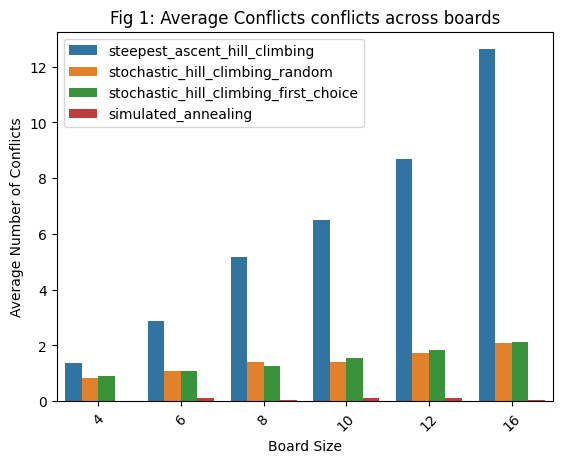

In [407]:
#Comparing the number of conflicts across the algorithm
import seaborn as sns

sns.barplot(
    x = "board_size",
    y = "avg_conflicts",
    hue = "algorithm",
    data = comparison
)

plt.title("Fig 1: Average Conflicts conflicts across boards")
plt.xlabel("Board Size")
plt.ylabel("Average Number of Conflicts")
plt.xticks(rotation=45)
plt.legend()
plt.show()



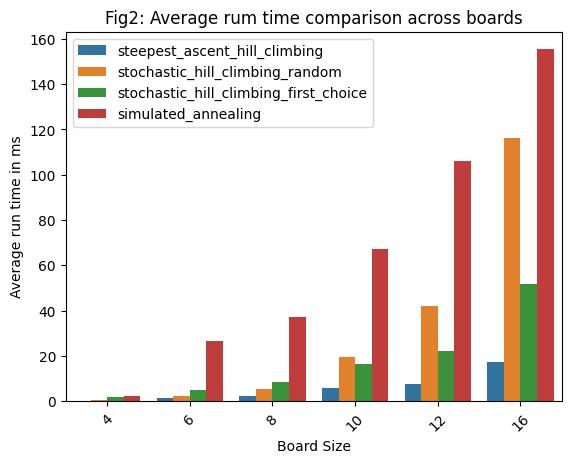

In [408]:
#Comparing the running time across algorithms
import seaborn as sns

sns.barplot(
    x = "board_size",
    y = "avg_run_time_ms",
    hue = "algorithm",
    data = comparison
)

plt.title("Fig2: Average rum time comparison across boards")
plt.xlabel("Board Size")
plt.ylabel("Average run time in ms")
plt.xticks(rotation=45)
plt.legend()
plt.show()



From the table, Fig1 and Fig2:

When comparing the 4 algorithms across different board sizes, the following points can be derived:
1. Simulated Annealing gives the minimal number of conflicts (almost 0) in a reasonable amount of time as compared to other algorithms.
2. Steepest Ascent hill climbing gives the result the fastest. However, it can be seen that as the board size increases, the number of conflicts also increases a lot as it has higher chances to get stuck in a local optima.
3. Selecting a random best neighbor in stochastic hill climbing gives a performs good only in some cases but outperforms steepest ascent algorithm for the larger board sizes in reasonable time periods.
4. First Choice hill climb also returns a better performance than steepest ascent in terms of number of conflicts observed. As it iterates run by run, neighbor by neighbor for all the iterations and stops after a given number of tries if no reduction in no of conflicts. Thus, this could perform slightly better than the Stochastic hill climb random algorithm in terms of time taken.

As the board size increases, the number of conflicts also increases. However, Simulated annealing provides a solution with fewer conflicts in a descent amount of time. Also, a high optimal percent for Simulated Annealing indicates that a high proportion of times in the random runs, no conflict states were achieved.

For the smaller board sizes upto 8, the stochastic hill climbing algorithms do a decent performance. However, post that, their performance also drops.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [409]:
# Code and description go here
import random
def move_one_queen(board):
  n = len(board)
  queen_to_move = random.randint(0, n-1)
  new_row = (board[queen_to_move] + random.choice([-1, 1])) % n
  neighbor = board.copy()
  neighbor[queen_to_move] = new_row
  return neighbor

def switch_columns(board):
  n = len(board)
  col1 = random.randint(0, n-1)
  col2 = random.randint(0, n-1)
  while col1 == col2:
    col2 = random.randint(0, n-1)
  neighbor = board.copy()
  neighbor[col1], neighbor[col2] = neighbor[col2], neighbor[col1]
  return neighbor


def move_two_queens(board):
  n = len(board)
  q1 = random.randint(0, n-1)
  q2 = random.randint(0, n-1)

  while q1 == q2:
    q2 = random.randint(0, n-1)

  new_row1 = (board[q1] + random.choice([-1, 1])) % n # % n to ensure that the choice stays within the bounds of n
  new_row2 = (board[q2] + random.choice([-1, 1])) % n
  neighbor = board.copy()
  neighbor[q1], neighbor[q2] = new_row1, new_row2
  return neighbor



# Code and description go here
def stochastic_hill_climbing_random_moves(n, move ,max_iters = None, verbose = False):
    max_iters = n * 500 if max_iters is None else max_iters
    if verbose: print('Hill Climb Random', n)
    board = random_board(n)
    if verbose: print('Initial Board Status:', show_board(board))
    current_conflicts = conflicts(board)
    neighbor_best = board.copy()
    #while True:
    for _ in range(max_iters):
        uphill_moves = []
        for _ in range(1000):
          neighbor =  move(board)
          neighbor_conflicts = conflicts(neighbor)
          if neighbor_conflicts < current_conflicts:
            uphill_moves.append(neighbor)
        if not uphill_moves:
          break
        neighbor_best = random.choice(uphill_moves)
        current_conflicts = conflicts(neighbor_best) #Update the current state of the board to the randomly chosen one
        board = neighbor_best
    return neighbor_best


def stochastic_hill_climbing_first_choice_moves(n, move,  max_iters = None, verbose = False):
    max_iters = n * 500 if max_iters is None else max_iters
    if verbose: print('Hill Climb First Choice', n)
    board = random_board(n)
    if verbose: print('Initial Board Status:', show_board(board))
    current_conflicts = conflicts(board)
    stop_counter = 0
    i = 0
    for i in range(max_iters):
        i += 1
        neighbor = move(board)
        neighbor_conflicts = conflicts(neighbor)
        if neighbor_conflicts < current_conflicts:
              if verbose: print('Number of tries:',i)
              board = neighbor
              current_conflicts = neighbor_conflicts
              stop_counter = 0
              if current_conflicts == 0:
                break
        else:
          stop_counter += 1
        if stop_counter > (0.10 * max_iters): #10 % of the total number of iteration at any given point
          break
    if verbose: print('Total Tries:', i)
    return board


def compare_results_local_moves(algorithm, n, move,  num_runs = 100):

  total_run_time = 0
  total_conflicts = 0
  optimal_solutions = 0

  for _ in range(num_runs):
    start_time = time.time()
    solution = algorithm(n, move)
    end_time = time.time()

    total_run_time += (end_time - start_time) * 1000
    total_conflicts += conflicts(solution)
    if conflicts(solution) == 0:
      optimal_solutions += 1

  avg_runtime = total_run_time / num_runs
  avg_conflicts = total_conflicts / num_runs
  optimal_percent = (optimal_solutions/num_runs) * 100
  return avg_runtime, avg_conflicts, optimal_percent

move_comparison = pd.DataFrame(columns=['algorithm','move','board_size', 'avg_run_time_ms', 'avg_conflicts', 'optimal_percent'])
algorithms = [stochastic_hill_climbing_random_moves, stochastic_hill_climbing_first_choice_moves]
moves = [move_one_queen, switch_columns, move_two_queens]
for algorithm in algorithms:
  for move in moves:
    avg_runtime, avg_conflicts, optimal_percent = compare_results_local_moves(algorithm, 8, move)
    move_comparison = move_comparison.append({'algorithm': algorithm.__name__,
                                              'move': move.__name__,
                                              'board_size': 8,
                                              'avg_run_time_ms': avg_runtime,
                                              'avg_conflicts': avg_conflicts,
                                              'optimal_percent': optimal_percent}, ignore_index=True)


In [410]:
move_comparison

,algorithm,move,board_size,avg_run_time_ms,avg_conflicts,optimal_percent
0,stochastic_hill_climbing_random_moves,move_one_queen,8,107.653365,3.08,1.0
1,stochastic_hill_climbing_random_moves,switch_columns,8,86.945353,4.20,0.0
2,stochastic_hill_climbing_random_moves,move_two_queens,8,140.099895,2.23,0.0
3,stochastic_hill_climbing_first_choice_moves,move_one_queen,8,9.279962,3.17,1.0
4,stochastic_hill_climbing_first_choice_moves,switch_columns,8,10.733082,4.69,0.0
5,stochastic_hill_climbing_first_choice_moves,move_two_queens,8,10.871956,2.25,1.0


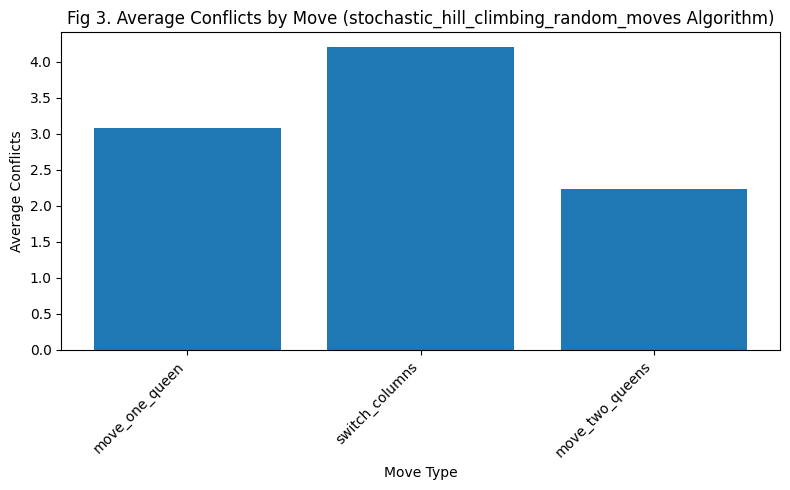

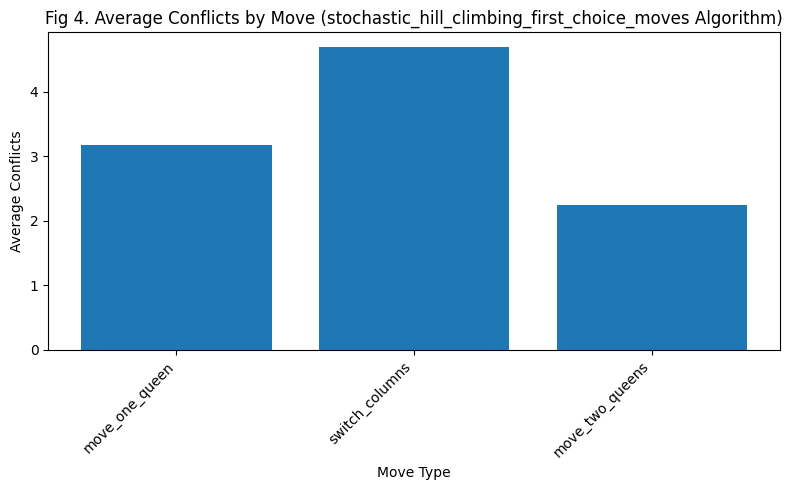

In [411]:
import pandas as pd
import matplotlib.pyplot as plt

algorithm_of_interest = ['stochastic_hill_climbing_random_moves', 'stochastic_hill_climbing_first_choice_moves']
i = 2 # Continuing the figure numbers
for algorithm in algorithm_of_interest:
  i +=1
  filtered_df = move_comparison[move_comparison['algorithm'] == algorithm]
  moves = filtered_df['move'].tolist()
  conflicts = filtered_df['avg_conflicts'].tolist()

  plt.figure(figsize=(8, 5))
  plt.bar(moves, conflicts)
  plt.xlabel('Move Type')
  plt.ylabel('Average Conflicts')
  plt.title('Fig {}. Average Conflicts by Move ({} Algorithm)'.format(i, algorithm))
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


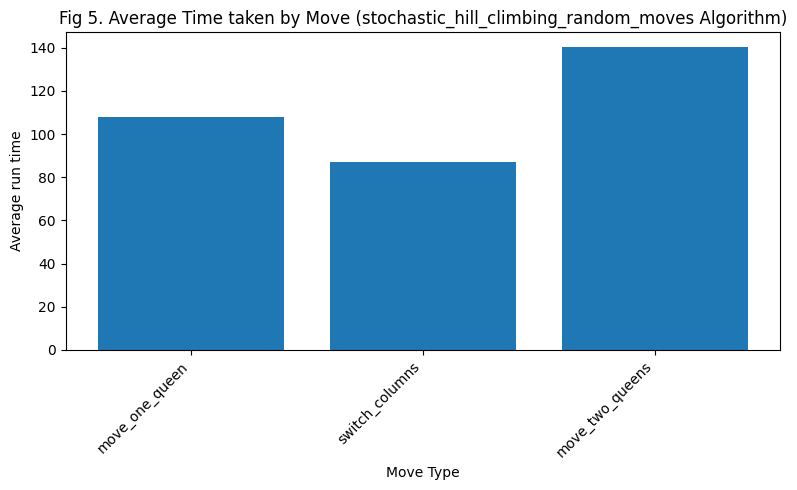

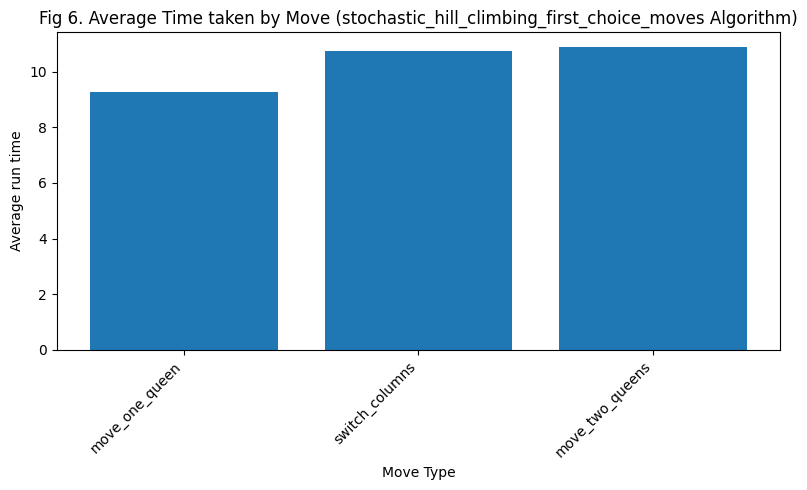

In [412]:
algorithm_of_interest = ['stochastic_hill_climbing_random_moves', 'stochastic_hill_climbing_first_choice_moves']
i = 4 # Continuing the figure numbers
for algorithm in algorithm_of_interest:
  i+=1
  filtered_df = move_comparison[move_comparison['algorithm'] == algorithm]
  moves = filtered_df['move'].tolist()
  conflicts = filtered_df['avg_run_time_ms'].tolist()

  plt.figure(figsize=(8, 5))
  plt.bar(moves, conflicts)
  plt.xlabel('Move Type')
  plt.ylabel('Average run time')
  plt.title('Fig {}. Average Time taken by Move ({} Algorithm)'.format(i, algorithm))
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

From the comparsion in the table, we can understand that having a definite moves with the two variants of Stochastic hill climb doesn't work as well as the random moves.

Referring to fig 3 and Fig 4, it can be understood that the move to move two queens performs better in terms of conflicts. The move to switch columns is the worst performing when compared in terms of the number of conflicts.

From Fig 5 and Fig 6, the best move of moving two queens takes more time when compared to others. The move to switch the columns of queens is the fastest but as seen earlier, it has more number of conflicts.

Moving one queen by one random position kind of balances between time taken and the number of conflicts observed.

Lower values of optimal percent indicate that a very few number of the times the optimal solution (conflicts = 0) was achieved during the runs suggesting the solution got stuck in a local minimal in most of the tries.

These local moves have a similar affect across both the variants of the hill climbing algorithm. However, randomly identified neighbors are better when exploring paths as there are no definite restrictions applied on which position must be explored next so the chances of getting stuck in a local optima are reduced across iterations


In [413]:
from google.colab import drive

!jupyter nbconvert --to html n_queens.ipynb

[NbConvertApp] Converting notebook n_queens.ipynb to html
[NbConvertApp] Writing 1148407 bytes to n_queens.html


## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here